# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Preprocessing

In [2]:
train = pd.read_csv("Downloads/BigMartSales/train.csv")
test = pd.read_csv("Downloads/BigMartSales/test.csv")
print(train)
train['source']= 'train'
test['source']= 'test'
data = pd.concat([train, test], sort=False, ignore_index=True)
data.shape, train.shape, test.shape

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

((14204, 13), (8523, 13), (5681, 12))

In [3]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [6]:
#filtering categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier', 'source']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
#Printing frequencies of categories column wise
for col in categorical_columns:
    print('Frequency of category in %s'%col)
    print(data[col].value_counts())

Frequency of category in Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of category in Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of category in Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of category in Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of category in Outlet_Type
Supermarket T

In [8]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier', aggfunc = np.mean)
print(item_avg_weight)
miss_bool = data.Item_Weight.isnull()
print ('Orignal #missing: %s' %sum(miss_bool))
data.loc[miss_bool, 'Item_Weight'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x : item_avg_weight.loc[x, 'Item_Weight'])
print ('Final #missing: %s' %sum(data['Item_Weight'].isnull()))

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]
Orignal #missing: 2439
Final #missing: 0


In [9]:
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: mode(x).mode[0]))
print(outlet_size_mode)
miss_bool = data['Outlet_Size'].isnull()
print('The # of missing values %s'%sum(miss_bool))


data.loc[miss_bool, 'Outlet_Size'] = data.loc[miss_bool, 'Outlet_Type'].apply(lambda x : outlet_size_mode[x])


print('the # of missing Values %s'%sum(data['Outlet_Size'].isnull()))

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
The # of missing values 4016
the # of missing Values 0


In [10]:
#Imputing visibility values where visibility_value==0
item_visibility_avg = data.pivot_table(values = 'Item_Visibility', columns = 'Item_Identifier')

miss_bool = (data['Item_Visibility']==0)

print('# of Products having Visibility 0:   %s'%sum(miss_bool))
data.loc[miss_bool, 'Item_Visibility'] = data.loc[miss_bool, 'Item_Identifier'].apply(lambda x : item_visibility_avg[x])
print('# of Products having Visibility 0:   %s'%sum((data['Item_Visibility']==0)))


# of Products having Visibility 0:   879
# of Products having Visibility 0:   0


In [11]:
#Detrmining visibility of product compared to mean across all stores

data['Visibility_Product_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/item_visibility_avg[x['Item_Identifier']], axis = 1)
data['Visibility_Product_MeanRatio']

0        0.931078
1        0.933420
2        0.960069
3        1.000000
4        1.000000
           ...   
14199    0.874729
14200    0.878292
14201    1.162245
14202    1.000000
14203    1.029678
Name: Visibility_Product_MeanRatio, Length: 14204, dtype: float64

## FEATURE ENGINEERIGN 

In [12]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [13]:
data['Years_Outlet'] = 2013 - data['Outlet_Establishment_Year']
data['Years_Outlet']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Years_Outlet, Length: 14204, dtype: int64

In [14]:
#Change categories of low fat:
print ('Original Categories:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [15]:
print(data['Item_Type_Combined'])
data.loc[data['Item_Type_Combined']=='Non-Consumable', 'Item_Fat_Content'] = 'Non_Edible'
#data.loc[:, ['Item_Fat_Content', 'Item_Type_Combined']]
data.Item_Fat_Content.value_counts()

0                  Food
1                Drinks
2                  Food
3                  Food
4        Non-Consumable
              ...      
14199              Food
14200              Food
14201    Non-Consumable
14202              Food
14203              Food
Name: Item_Type_Combined, Length: 14204, dtype: object


Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64

In [16]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Visibility_Product_MeanRatio,Item_Type_Combined,Years_Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,0.931078,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0.933420,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,0.960069,Food,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,1.000000,Food,15
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,1.000000,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,0.874729,Food,16
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,0.878292,Food,4
14201,NCO17,10.00,Non_Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test,1.162245,Non-Consumable,11
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test,1.000000,Food,6


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
val_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']
le = LabelEncoder()
for i in val_mod:
    data[i] = le.fit_transform(data[i])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Visibility_Product_MeanRatio,Item_Type_Combined,Years_Outlet,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,0.931078,1,14,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0.933420,0,4,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,0.960069,1,14,9
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,1.000000,1,15,0
4,NCD19,8.93,1,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,1.000000,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,NaN,test,0.874729,1,16,8
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,NaN,test,0.878292,1,4,3
14201,NCO17,10.00,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,2,1,1,NaN,test,1.162245,2,11,7
14202,FDJ26,15.30,2,0.088380,Canned,214.6218,OUT017,2007,2,1,1,NaN,test,1.000000,1,6,2


In [18]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                                     'Item_Type_Combined','Outlet'])

In [19]:
data.dtypes

Item_Identifier                  object
Item_Weight                     float64
Item_Visibility                 float64
Item_Type                        object
Item_MRP                        float64
Outlet_Identifier                object
Outlet_Establishment_Year         int64
Item_Outlet_Sales               float64
source                           object
Visibility_Product_MeanRatio    float64
Years_Outlet                      int64
Item_Fat_Content_0                uint8
Item_Fat_Content_1                uint8
Item_Fat_Content_2                uint8
Outlet_Location_Type_0            uint8
Outlet_Location_Type_1            uint8
Outlet_Location_Type_2            uint8
Outlet_Size_0                     uint8
Outlet_Size_1                     uint8
Outlet_Size_2                     uint8
Outlet_Type_0                     uint8
Outlet_Type_1                     uint8
Outlet_Type_2                     uint8
Outlet_Type_3                     uint8
Item_Type_Combined_0              uint8


In [20]:
data.drop(columns = ['Item_Type', 'Outlet_Establishment_Year'], inplace=True)

In [21]:
test = data.loc[data['source']=='test']
train = data.loc[data['source']=='train']
test.drop(columns= ['source', 'Item_Outlet_Sales' ], inplace=True)
train.drop(columns = ['source'], inplace= True)
test = test.reset_index()
test.drop(columns = ['index'], inplace = True)

/home/akshay/anaconda3/envs/snowflakes/lib/python3.8/site-packages/pandas/core/frame.py:3987: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# MODEL TRAINING

# BASELINE MODEL

In [23]:
mean_sales  = train['Item_Outlet_Sales'].mean()
base1 = test[['Item_Identifier', 'Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales
base1.to_csv('alg0.csv', index=False)

<ipython-input-23-489c67aa2dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


# LINEAR REGRESSION MODEL


 Model Report
RMSE: 1128
CV Score : Mean - 1129 | Std - 43.4 | Min - 1075 | Max - 1210


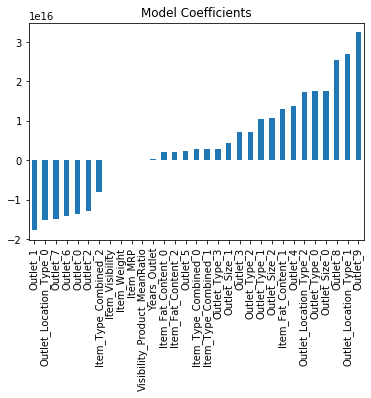

In [24]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

from sklearn.metrics import mean_squared_error
from sklearn import metrics
predictors = [x for x in train.columns if x not in [target]+IDcol]
#print(predictors, train.describe(), test.describe())
#print(train.dtypes)
#print(train[predictors])
#'train_predictions'

from sklearn.linear_model import LinearRegression
alg1 = LinearRegression(normalize = True)
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(alg1, train[predictors], train[target], cv = 20, scoring = 'neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

alg1.fit(train[predictors], train[target])
train_predictions = alg1.predict(train[predictors])

print('\n Model Report')
print('RMSE: %.4g'%np.sqrt(metrics.mean_squared_error(train[target].values, train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
test[target] = alg1.predict(test[predictors])
submission = pd.DataFrame({x: test[x] for x in IDcol+[target]})


submission.to_csv('submission.csv', index=False)
coef1 = pd.Series(alg1.fit(train[predictors], train[target]).coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## FUNCTION FOR MODEL FITTING

In [25]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']
from sklearn import  metrics
from sklearn.model_selection import cross_val_score
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename ):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring = 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    print('/n Model Report')
    print('RMSE: %.4g'%np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    dtest[target] = alg.predict(dtest[predictors])
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol+[target]})
    submission.to_csv(filename, index=False)

## RIDGE MODEL 

/n Model Report
RMSE: 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


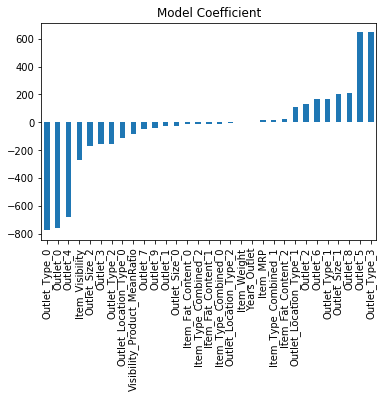

In [26]:
from sklearn.linear_model import Ridge
alg2 = Ridge(alpha = 0.05, normalize = True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.fit(train[predictors], train[target]).coef_, predictors).sort_values()
coef2.plot(kind = 'bar', title = 'Model Coefficient')

## DECISION TREE MODEL

/n Model Report
RMSE: 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


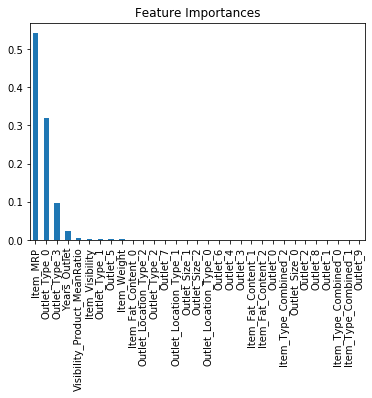

In [27]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

## RANDOM FOREST MODEL

/n Model Report
RMSE: 1073
CV Score : Mean - 1084 | Std - 43.51 | Min - 1020 | Max - 1161


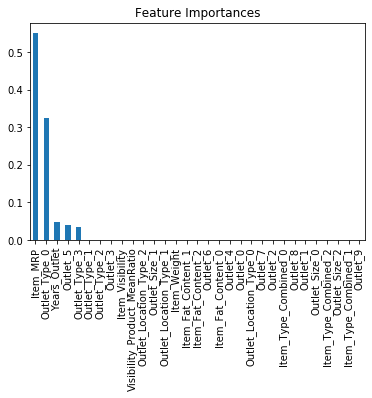

In [28]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')